<a href="https://colab.research.google.com/github/polinamaximenko/compling/blob/main/workbook_distributional_PM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Курс "Компьютерная лингвистика" | НИУ ВШЭ Санкт-Петербург
(c) В.И. Фирсанова
```

# Практика: Введение в дистрибутивную семантику и знакомство с Google Colab

## Welcome to Google Colab

**Jupyter-ноутбук — интерактивная среда разработки**

Свойства Jupyter

* работа в ячейках
  * мгновенное отображение результата работы фрагментов кода
  * можно разбить выполнение кода на части
  * ячейки можно запускать в произвольном порядке

* код и текст
  * Jupyter поддерживает 2 типа ячеек - текстовые и кодовые
  * всю вашу работу можно документировать в текстовых ячейках

* визуализация
  * табличных данных
  * графиков
  * \+ красивый вывод данных

* область применения
  * машинное обучение
  * дата саенс
  * большие данные
  * научные вычисления
  * документация

**Интерфейс Google Colab — разновидность Jupyter-ноутбука**

Основные отличия

* интеграция с внешними сервисами
  * GitHub (можно напрямую скачивать и загружать ноутбуки)
  * Google Drive (там можно хранить данные, модели; нужно подключить свой диск к ноутбуку)
  * NEW! генеративный ИИ может помочь вам с написанием кода

* аппаратный ускоритель
  * GPU / TPU используется для машинного обучения и других ресурсоёмких вычислений
  * бесплатный доступ / недорогая подписка
  * см. меню `Runtime` - `Change runtime type`

**Основы работы с интерфейсом Google Colab**

***Открыть файл***

Горячие клавиши: `Ctrl + O` или `Cmd + O`

Опции:

* загружаем файл *.ipynb с локального диска
* открываем файл *.ipynb с Google-диска
* открываем файл *.ipynb с GitHub (URL, поиск пользователя)
* открываем из GitHub с помощью кнопки `Open in Colab`

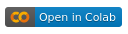

***Сохранить файл***

Горячие клавиши: сохранить на Google-диске `Ctrl + S` или `Cmd + S`

Возможности:

* сохранить копию в репозитории на GitHub (`File` - `Save a copy in GitHub`)
* сохранить GitHub Gist
* скачать *.ipynb (Jupyter-ноутбук)
* скачать *.py (скрипт на Python без деления на ячейки и текстовой информации)

***Внести изменения в файл***

Можно создать кодовую или текстовую ячейку.

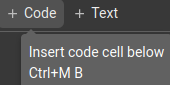

В кодовой ячейке можно ввести код на языке Python или команды shell.

Горячие клавиши:
- новая ячейка `Ctrl + M + B` или `Cmd + M + B`
- запустить ячейку `Shift + Enter`


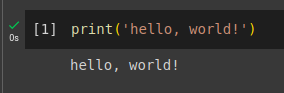

Ячейка содержит следующую информацию
- вывод данных
- время исполнения кода
- порядковый номер ячейки по ходу исполнения

In [ ]:
print('hello, world!')

hello, world!


Текстовые ячейки оформляются как Markdown.

См. [руководство по работе с Markdown](https://github.com/vifirsanova/compling/blob/main/markdown.md/).

Руководство можно использовать для оформления файла README.md в вашем репозитории на GitHub.

## Дистрибутивная семантика

[Efficient Estimation of Word Representations in
Vector Space (Mikolov et al., 2013)](https://arxiv.org/pdf/1301.3781.pdf)

### **Задача 1.** Обучаем эмбеддинги с Gensim

Что такое Gensim?

* библиотека Python с открытым исходным кодом
* области применения:
  * извлечение информации
  * обработка естественного языка
* задачи:
  * тематическое моделирование
  * индексирование документов
  * поиск сходства

При использовании любой библиотеки, нужно использовать ее [документацию](https://radimrehurek.com/gensim/index.html)

Загрузим корпус текстов Шекспира напрямую из GitHub с помощью команды shell `wget`

In [ ]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-01-27 10:51:35--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.04s   

2024-01-27 10:51:35 (27.3 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [ ]:
# прописываем путь к файлу
file_path = 'input.txt'

# открываем файл для чтения ('r')
with open(file_path, 'r') as file:
    # записываем содержимое файла в переменную
    text_content = file.read()

# выведем на экран часть содержимого
text_content[:100]

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'

In [ ]:
len(text_content)

1115394

Pre-processing / предобработка с помощью регулярных выражений и токенизатора NLTK

In [ ]:
import re

def clean_text(text):
    # приводим текст к нижнему регистру
    text = text.lower()

    # удаляем все символы кроме букв
    text = re.sub(r'[^a-z\s]', '', text)

    # удаляем двойные пробелы
    text = re.sub(r'\s+', ' ', text).strip()

    return text

cleaned_text = clean_text(text_content)

# выведем на экран часть обработанного текста
cleaned_text[:100]

'first citizen before we proceed any further hear me speak all speak speak first citizen you are all '

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# токенизация по словам
tokens = word_tokenize(cleaned_text)

# выведем на экран несколько токенов
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['first',
 'citizen',
 'before',
 'we',
 'proceed',
 'any',
 'further',
 'hear',
 'me',
 'speak']

Обучение

`sentences` - итерируемый объект; список токенов либо список списков токенов (токенизированных предложений)

`vector_size` - размерность вектора

`window` - размер контекстного окна

`min_count` - пороговое значение (если слово встречается реже, оно не попадает в нашу модель)

`workers` - потоки (распараллеливание для ускорение работы)

In [ ]:
from gensim.models import Word2Vec

# задаем параметры нашей модели
model = Word2Vec(sentences=[tokens], vector_size=128, window=4, min_count=2, workers=4)

In [ ]:
# выведем результат обучения модели
model.wv['king']

array([-2.9625958e-03, -9.6499352e-03,  6.9704349e-03,  2.1572320e-03,
        4.5800274e-03, -7.4395430e-03,  7.2083785e-03, -5.1279110e-03,
        8.0897525e-04,  4.9012117e-03,  1.1064851e-02,  2.9830605e-04,
       -7.1927235e-03, -8.8213226e-03,  9.1941506e-03,  3.4082094e-03,
        2.8421406e-03, -1.0048895e-03,  3.2313338e-03, -5.0658244e-03,
        2.3353919e-03,  2.5573310e-03, -8.9155035e-03, -2.1740240e-03,
       -8.1235990e-03,  4.1823690e-03, -6.9903256e-03,  7.5007854e-03,
        6.0955621e-04,  4.2317030e-03, -1.0680850e-02,  9.9491971e-03,
        6.7516989e-03,  1.3597418e-03,  4.2685806e-03,  3.9675743e-03,
        9.9795740e-03, -4.4716541e-03,  2.5279040e-03,  3.5384721e-03,
        1.1460065e-03,  1.0135203e-02, -6.0659791e-03,  2.2410069e-04,
       -1.2289699e-03, -1.4138964e-03, -8.6713433e-03,  3.0450094e-03,
       -3.0801422e-03,  5.3188950e-03,  1.3998667e-02, -2.8108920e-03,
        6.5447018e-04,  4.4668680e-03, -1.3443410e-03, -6.8884627e-03,
      

### **Задача 2.** Считаем сходство

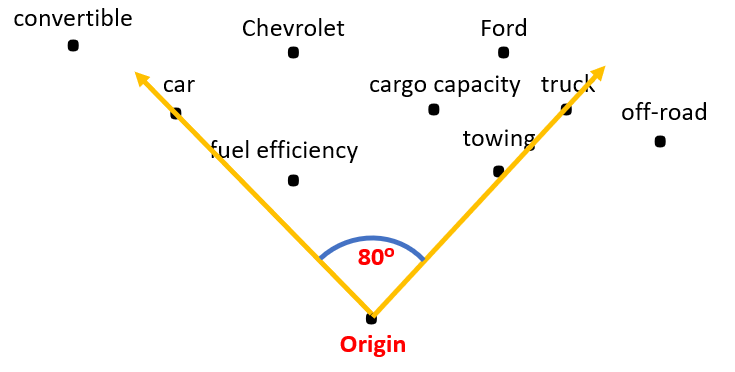

StandingFuture, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons

Функция `most_similar`отображает самые похожие по векторному представлению слова и степень похожести (по косинусной мере).

In [ ]:
model.wv.most_similar(["king"])

[('part', 0.7264175415039062),
 ('sudden', 0.7192797064781189),
 ('neither', 0.7191898226737976),
 ('tell', 0.7171313166618347),
 ('makes', 0.7158307433128357),
 ('keep', 0.7156261205673218),
 ('senate', 0.715485692024231),
 ('third', 0.7153489589691162),
 ('call', 0.7148478627204895),
 ('into', 0.7146128416061401)]

`similarity` показывает степень вероятности, насколько слова близки

In [ ]:
model.wv.similarity('king', 'queen')

-0.13548335

In [ ]:
model.wv.similarity('king', 'prince')

0.06384571

`doesnt_match` - модель определяет лишнее слово в списке (наименее похожее на два других)

In [ ]:
model.wv.doesnt_match(['king', 'prince', 'queen'])

'queen'

### **Задача 3.** Визуализация

Важный этап подготовки данных к визуализации - сокращение размерности вектора.

Мы обучили вектора размером 100. Теперь нужно превратить их в 2D.

Для этого используют разные алгоритмы, мы воспользуемся PCA (principal component analysis), статистической моделью, которая приводит всю информацию о полученном контенте к виду матрицы меньшей размерности, например, к виду таблицы (двухмерный массив), удобной для построения графиков и эксплораторного анализа данных.

Чтобы понять, как работает PCA, можно почитать [этот блог](https://builtin.com/data-science/step-step-explanation-principal-component-analysis).

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

from sklearn.decomposition import PCA

Создаем функцию для отрисовки графика с помощью PCA.

In [ ]:
def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  # сократить размерность векторов до 2D
  vectors_2d = PCA().fit_transform(word_vectors)
  # отрисовка изображения, задаем размер 12 на 10
  plt.figure(figsize=(6,6))
  # задаем цвет точек и ссылаемся на данные по осям x (0) и y (1)
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='g')
  # добавляем подписи к данным, проходимся по списку слов
  for i, word in enumerate(words):
    # соотносим слово с его двухмерным вектором
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

Для визуализации давайте посмотрим, какие эпитеты Шекспир использует для описания королей и королев!

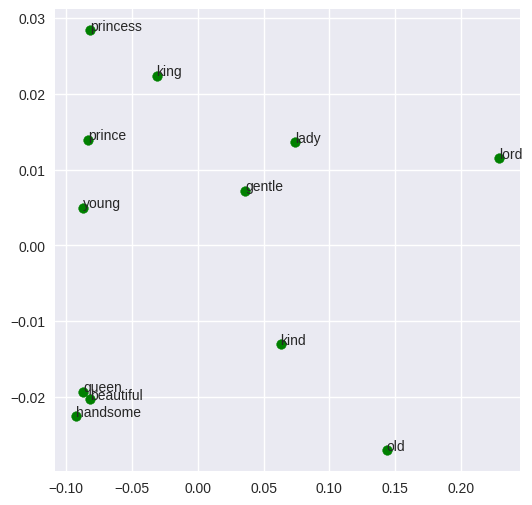

In [ ]:
pca_scatterplot(model, ['handsome', 'beautiful', 'kind', 'gentle', 'old', 'young',
                                'prince', 'princess', 'lady', 'king', 'queen', 'lord'])

## Домашнее задание

**Базовый уровень:**

* удалить стоп-слова в корпусе текстов Шескпира, лемматизировать корпус (достаточно выбрать что-то одно)
* заново обучить вектора
* найти сходства и различия между отдельными векторами
* визуализировать данные с помощью кода в заданных ячейках (можно просто перезапустить эти ячейки без изменений)
* представить выводы о проделанной работы: удалось ли вам обнаружить связи после удаления стоп-слов, лемматизации?

**Уверенный уровень:**

* обучить такую же модель Word2Vec на другом, более крупном корпусе
* найти сходства и различия между отдельными векторами
* визуализировать данные с помощью кода в заданных ячейках
* представить выводы о проделанной работы: удалось ли вам обнаружить какие-либо связи и отношения?

**Продвинутый уровень:**

* обучить FastText с помощью [туториала](https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html)
* найти сходства и различия между отдельными векторами
* объяснить принцип работы FastText своими словами

**Опционально для любого уровня:**

* поиграть с визуализацией: поменять стиль, цвета графики
* выбрать другой набор слов для визуализации



### Применение модели Word2Vec на корпусе текстов "Гарри Поттера" (на русском языке)

#### Предобработка текстов

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filenames = ['1_-Garri-Potter-i-filosofskiy-kamen.txt', '2_-Garri-Potter-i-taynaya-komnata.txt', '3_-Garri-Potter-i-uznik-Azkabana.txt', '4_-Garri-Potter-i-kubok-ognya.txt', '5_-Garri-Potter-i-orden-Fenixa.txt', '6_-Garri-Potter-i-prints-polukrovka_1.txt', '7_-Garri-Potter-i-dary-smerti.txt']
text = ''
path = '/content/drive/MyDrive/4 КУРС/Проект_КЛ/Rosman/'
for filename in filenames:
    with open(path+filename, 'r') as file:
        text += file.read()

In [4]:
text[-200:]

'ним все будет в порядке, — тихо сказала Джинни.\n\nВзглянув на нее, Гарри рассеянно опустил руку и прикоснулся к шраму на лбу.\n\n— Конечно.\n\nШрам не болел уже девятнадцать лет. Все было хорошо.\n\n\n\n\n\n\n\n\n\n'

In [5]:
import re

def clean_text(text):
    # приводим текст к нижнему регистру
    text = text.lower()

    # удаляем все символы кроме букв
    text = re.sub(r'[^а-яa-z\s]', '', text)

    # удаляем двойные пробелы
    text = re.sub(r'\s+', ' ', text).strip()

    return text

cleaned_text = clean_text(text)

# выведем на экран часть обработанного текста
cleaned_text[-200:]

'полнял сердце грустью с ним все будет в порядке тихо сказала джинни взглянув на нее гарри рассеянно опустил руку и прикоснулся к шраму на лбу конечно шрам не болел уже девятнадцать лет все было хорошо'

In [6]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 65.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=ac2c603ab7fdbf338972b1be51be7a0cc53c54767aed0e0e56017eeeac881bf2
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [7]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

import pymorphy2
morph = pymorphy2.MorphAnalyzer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
# токенизация по словам
tokens = word_tokenize(cleaned_text)
# лемматизация
lemmas = [(morph.parse(word)[0]).normal_form for word in tokens]
lemmas[:20]

['джоан',
 'роулинга',
 'гарри',
 'поттер',
 'и',
 'философский',
 'камень',
 'глава',
 'мальчик',
 'который',
 'выжить',
 'мистер',
 'и',
 'миссис',
 'дурсль',
 'проживать',
 'в',
 'дом',
 'номер',
 'четыре']

In [67]:
# сохраним токены и леммы в отдельные файлы для последующего использования
with open('harry_potter_ru_tokenized.txt', 'w', encoding='utf-8') as file:
    file.write(' '.join(tokens))
with open('harry_potter_ru_lemmatized.txt', 'w', encoding='utf-8') as file:
    file.write(' '.join(lemmas))

#### Обучение модели

In [12]:
from gensim.models import Word2Vec

# обучим две версии модели: одну - на токенизированных текстах, другую - на лемматизированных
model_t = Word2Vec(sentences=[tokens], vector_size=256, window=4, min_count=2, workers=4)
model_l = Word2Vec(sentences=[lemmas], vector_size=256, window=4, min_count=2, workers=4)

In [13]:
# проверим работу обеих моделей
model_t.wv['волшебник']

array([ 2.75345007e-03,  1.07277185e-04, -3.90584581e-03, -2.45025381e-03,
        1.51602831e-03, -2.77920021e-03,  3.52310436e-03, -4.68343031e-04,
        2.43611680e-03, -3.01989773e-03, -9.39204823e-04,  5.15977852e-04,
        2.54348526e-03,  1.71885779e-03,  2.52053048e-03,  1.93813071e-03,
        1.55758671e-03,  2.89179524e-03, -2.79614236e-04, -3.12923733e-03,
        2.86218571e-03, -1.27375452e-03, -1.39069511e-03, -2.13631382e-03,
        2.45964248e-03,  1.54170534e-03, -1.56123936e-03,  9.03233420e-04,
        2.01959955e-03,  2.68463930e-03, -3.83660197e-04, -2.65196944e-03,
        1.28336251e-05, -3.56914196e-03, -3.46060842e-05, -1.25904847e-03,
        1.11863855e-03, -2.20063236e-03, -2.07478506e-03,  1.18192099e-03,
        2.84787640e-03,  2.64805276e-04, -5.19760884e-04,  3.51918535e-03,
        3.06161493e-03, -5.70325181e-04,  1.60271348e-03, -3.18006380e-03,
        2.76224175e-03, -1.90903759e-03,  2.64772167e-03, -1.57961203e-03,
        2.78953556e-03,  

In [14]:
model_l.wv['волшебник']

array([-3.3663916e-03,  7.5925933e-04,  1.2340909e-04, -1.6539032e-03,
        1.9198218e-03, -1.5222146e-03, -2.1229326e-03, -2.5469838e-03,
        2.9484406e-03,  7.2633754e-04, -3.8055792e-03,  6.4938329e-05,
       -4.6028662e-04,  3.7033283e-03,  2.4101837e-03,  3.8940613e-03,
       -1.6023591e-03,  6.0874270e-04, -7.5901207e-04, -4.2757997e-04,
        1.8423828e-03,  1.0638591e-04,  2.5989697e-03, -3.4641018e-03,
        1.7768308e-03, -4.5114197e-04, -3.1604534e-03, -4.2916276e-04,
       -2.4897568e-03, -2.8196597e-03, -3.5301736e-03,  3.4667943e-03,
        3.7502097e-03,  3.3943979e-03,  3.1219311e-03,  1.1224868e-03,
        3.6701239e-03,  1.3238182e-03,  1.5851674e-03,  3.8718614e-03,
        2.4473714e-04, -3.8184696e-03,  1.3081883e-03,  3.1221216e-03,
        2.2596139e-03, -6.4692786e-04,  3.7961584e-03, -3.8416465e-03,
        1.4032056e-03, -1.7009703e-03, -2.5440333e-04, -4.0276442e-04,
       -2.3034490e-03, -6.3148700e-04,  5.7411287e-04, -2.9506083e-03,
      

#### Вычисление сходства и визуализация

In [41]:
model_t.wv.most_similar(["хогвартс"])

[('упор', 0.3115347623825073),
 ('прислониться', 0.25716763734817505),
 ('позвать', 0.25387290120124817),
 ('черепаху', 0.2393714189529419),
 ('возникали', 0.23301821947097778),
 ('разойтись', 0.22734491527080536),
 ('пробудила', 0.225017249584198),
 ('роде', 0.2200518101453781),
 ('обручем', 0.21855726838111877),
 ('выглядывая', 0.21625018119812012)]

In [42]:
model_l.wv.most_similar(["хогвартс"])

[('соперник', 0.21735027432441711),
 ('закрываться', 0.21020010113716125),
 ('амфитеатр', 0.20468783378601074),
 ('модификация', 0.20281191170215607),
 ('сквиб', 0.19644445180892944),
 ('заторопиться', 0.19422517716884613),
 ('унизить', 0.19348853826522827),
 ('горячо', 0.19251520931720734),
 ('высказаться', 0.19226180016994476),
 ('вопреки', 0.19090327620506287)]

Кажется, что результаты модели не слишком интерпретируемые...

In [56]:
model_t.wv.similarity('гарри', 'рон')

0.024573658

In [51]:
model_t.wv.similarity('гермиона', 'рон')

-0.00720967

In [49]:
model_t.wv.doesnt_match(['гарри', 'рон', 'гермиона'])

'гермиона'

In [52]:
model_l.wv.similarity('гарри', 'рон')

-0.0016268399

In [53]:
model_l.wv.similarity('гермиона', 'рон')

0.079216495

In [54]:
model_l.wv.doesnt_match(['гарри', 'рон', 'гермиона'])

'гарри'

Можно предположить, что модель, обученная без лемматизации, работает лучше, так как распознает близость слов "Гарри" и "Рон" по полу.

In [60]:
model_t.wv.similarity('волшебник', 'маг')

0.044960782

In [58]:
model_l.wv.similarity('волшебник', 'маг')

0.046756905

На примерах "волшебник" и "маг" модели показывают примерно равную схожесть.

Визуализируем:

In [62]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

from sklearn.decomposition import PCA

In [63]:
def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  # сократить размерность векторов до 2D
  vectors_2d = PCA().fit_transform(word_vectors)
  # отрисовка изображения, задаем размер 6 на 6
  plt.figure(figsize=(6,6))
  # задаем цвет точек и ссылаемся на данные по осям x (0) и y (1)
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='b')
  # добавляем подписи к данным, проходимся по списку слов
  for i, word in enumerate(words):
    # соотносим слово с его двухмерным вектором
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

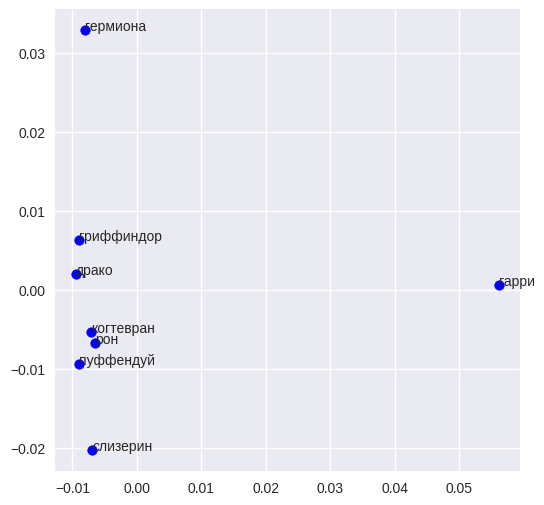

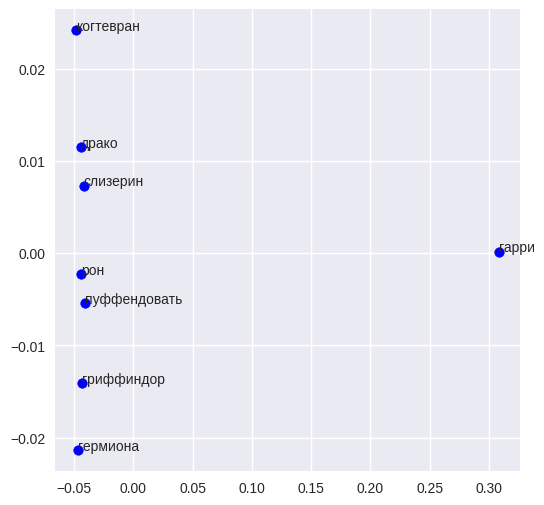

In [68]:
pca_scatterplot(model_t, ['гарри', 'рон', 'гермиона', 'драко', 'гриффиндор', 'когтевран',
                          'слизерин', 'пуффендуй'])
pca_scatterplot(model_l, ['гарри', 'рон', 'гермиона', 'драко', 'гриффиндор', 'когтевран',
                          'слизерин', 'пуффендовать'])
# в лемматизированной версии "Пуффендуй" превратился в "пуффендовать" xD

Любопытно, что обученная на леммах модель показывает более логичные результаты: близко находятся вектора слов "Драко" и "Слизерин", "Гермиона" и "Гриффиндор". В то же время в обеих моделях парадоксально сходны вектора "Рон" и "Пуффендуй", а вектор "Гарри" отдален от всех остальных.

### Применение модели FastText

Модель FastText так же обучает эмбеддинги слов, но, в отличие от Word2Vec, рассматривает слово не целиком, как единый элемент, а как совокупность морфем (subwords), которые считаются нграммами символов, из которых состоит слово. Таким образом, вектор слова — сумма всех векторов его символов. FastText справляется с синтаксическими задачами лучше Word2Vec и полезен при обработке морфологически богатых языков.

#### Предобработка корпуса

In [110]:
from nltk.tokenize import sent_tokenize
def clean_sents(text):
    # приводим текст к нижнему регистру
    text = text.lower()

    # удаляем двойные пробелы
    text = re.sub(r'\s+', ' ', text).strip()

    # заменяем все знаки препинания в конце предложений на точку
    text = re.sub(r'[\!\?\.]+', '.', text)

    # удаляем все символы кроме букв, точек и пробелов
    text = re.sub(r'[^а-яa-z\.\s]', '', text)

    # делим текст на предложения
    text = sent_tokenize(text)

    return text

cleaned_sents = clean_sents(text)

# выведем на экран часть обработанного текста
cleaned_sents[1]

'уж от когокого а от них никак нельзя было ожидать чтобы они попали в какуюнибудь странную или загадочную историю.'

In [129]:
# приведем корпус к виду, который подается на вход модели (список списков со словами по предложениям)
sents = [(re.sub(r'\.', '', sent)).split() for sent in cleaned_sents]

In [130]:
sents[:10]

[['джоан',
  'роулинг',
  'гарри',
  'поттер',
  'и',
  'философский',
  'камень',
  'глава',
  'мальчик',
  'который',
  'выжил',
  'мистер',
  'и',
  'миссис',
  'дурсль',
  'проживали',
  'в',
  'доме',
  'номер',
  'четыре',
  'по',
  'тисовой',
  'улице',
  'и',
  'всегда',
  'с',
  'гордостью',
  'заявляли',
  'что',
  'они',
  'слава',
  'богу',
  'абсолютно',
  'нормальные',
  'люди'],
 ['уж',
  'от',
  'когокого',
  'а',
  'от',
  'них',
  'никак',
  'нельзя',
  'было',
  'ожидать',
  'чтобы',
  'они',
  'попали',
  'в',
  'какуюнибудь',
  'странную',
  'или',
  'загадочную',
  'историю'],
 ['мистер',
  'и',
  'миссис',
  'дурсль',
  'весьма',
  'неодобрительно',
  'относились',
  'к',
  'любым',
  'странностям',
  'загадкам',
  'и',
  'прочей',
  'ерунде'],
 ['мистер',
  'дурсль',
  'возглавлял',
  'фирму',
  'под',
  'названием',
  'граннингс',
  'которая',
  'специализировалась',
  'на',
  'производстве',
  'дрелей'],
 ['это',
  'был',
  'полный',
  'мужчина',
  'с',
  'оче

#### Обучение модели и примеры применения

In [131]:
from gensim.models.fasttext import FastText

# зададим размерность векторов = 300 (хорошее стандартное значение, судя по статьям)
model = FastText(vector_size=300)

# создаем список слов
model.build_vocab(sents)

# обучаем модель со значениями параметров по умолчанию
model.train(
    sents, epochs=model.epochs,
    total_examples=model.corpus_count, total_words=model.corpus_total_words,
)

(3373233, 4580325)

In [132]:
# проверим работу модели
wv = model.wv
wv['волшебник']

array([-0.45324817, -0.15637654,  0.19070452, -0.38347358,  0.54574066,
       -0.06351783, -0.09221989,  0.36370963,  0.1795068 ,  0.24916293,
       -0.0757425 ,  0.16496499, -0.42934993,  0.44003305,  0.22839555,
       -0.34938696,  0.02787391,  0.41767353,  0.36836147, -0.02740067,
        0.07616279, -0.14888805, -0.15001176,  0.3126446 ,  0.25226578,
        0.52426386,  0.52896523, -0.00261667, -0.44915128, -0.09404477,
       -0.08636907,  0.19791985, -0.08073058,  0.5222441 ,  0.275779  ,
       -0.17452659, -0.08404554, -0.2715032 ,  0.7526668 , -0.2829033 ,
        0.39951956, -1.1771216 , -0.40714028, -0.03198459,  0.12288605,
        0.83251154,  0.11766685, -0.43882388,  0.17377897,  0.19595727,
       -0.31336462,  0.0964518 ,  0.11725083,  0.26978838,  0.05657682,
       -0.7771023 , -0.24013707,  0.08042773,  0.23474933,  0.7814411 ,
        0.06586244, -0.17392111, -0.56192   , -0.38165042, -0.24187726,
        0.2385272 ,  0.53478104, -0.3146719 , -0.08417353,  0.19

In [133]:
# вычислим сходства между разными словами
wv.similarity("гермиона", "гарри")

0.16885704

In [137]:
wv.similarity("гарри", "рон")

0.79637295

In [135]:
wv.doesnt_match(["гарри", "рон", "гермиона"])

'гермиона'

In [136]:
wv.doesnt_match(["гарри", "рон", "драко"])

'драко'

Похоже, fasttext и правда хорошо работает!

In [147]:
wv.most_similar("хогвартс", topn=20)

[('хогвартсу', 0.9986773133277893),
 ('хогвартсе', 0.9945032000541687),
 ('хогвартса', 0.9857644438743591),
 ('хогвартсэкспрессе', 0.9649022221565247),
 ('хогвартсэкспресс', 0.9603250026702881),
 ('азкабане', 0.94978928565979),
 ('хогвартский', 0.9339631795883179),
 ('обществе', 0.9321210980415344),
 ('одиночестве', 0.928432047367096),
 ('детстве', 0.9276929497718811),
 ('ордене', 0.9225748181343079),
 ('общество', 0.9207679629325867),
 ('дежурстве', 0.919559895992279),
 ('хогвартсом', 0.9195497035980225),
 ('школу', 0.9195043444633484),
 ('комунибудь', 0.9173568487167358),
 ('впоследствии', 0.9162335395812988),
 ('школе', 0.9160194396972656),
 ('хогсмиде', 0.9150161147117615),
 ('хогсмида', 0.9136425852775574)]

В наиболее похожих словах ожидаемо находим формы исходного слова и однокоренные (отражает принцип работы модели), но вместе с тем и более интерпретируемые схожести: Азкабан, общество, орден, школа, Хогсмид.

In [152]:
wv.n_similarity(['альбус', 'дамблдор'], ['северус', 'снегг'])

0.94327205